# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Fadli Fauzi Sileuw
- **Email:** anakxsat@gmail.com
- **ID Dicoding:** fadli_sileuw

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara di Guanyuan dari tahun 2013 hingga 2017?
- Apakah ada perbedaan yang signifikan antara polutan di musim dingin dan musim panas?
- Bagaimana hubungan antara polutan udara (PM2.5) dan kecepatan angin di Guanyuan?
- Bagaimana konsentrasi polutan berfluktuasi berdasarkan jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### Menilai tabel guanyuan_df

In [2]:
guanyuan_df = pd.read_csv('PRSA_Data_Guanyuan_20130301-20170228.csv')
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


**Insight:**
- Disini terlihat Dataset sudah berhasil dibaca oleh library pandas
- disini juga sudah terlihar bahwa terdapat sekitar 18 column didalam dataset tersebut baik itu dari nilainya numerik dan string/katergori

### Assessing Data

In [3]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
guanyuan_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


In [5]:
print('Jumlah duplikasi: ', guanyuan_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
guanyuan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- disini juga kita dapat melihat dari info bahwa tedapat sekitar 35064 data yang terdiri dari tipe data float, integer, dan object
- kemudian juga terdapat cukup banyak data yang hilang dimulai dari:
  1. PM2.5: 616 nilai hilang
  2. PM10: 429 nilai hilang
  3. SO2: 474 nilai hilang
  4. NO2: 659 nilai hilang
  5. CO: 1753 nilai hilang
  6. O3: 1173 nilai hilang
  7. TEMP, PRES, DEWP, RAIN: 20 nilai hilang
  8. wd (arah angin): 81 nilai hilang
  9. WSPM (kecepatan angin): 14 nilai hilang
- Tidak terdapat duplikasi data dari dataset ini, karena bersifat time-series juga datanya
- dengan method describe() dapat diketahui informasi parameter statistik dari guanyuan_df

### Cleaning Data

### Membersihkan tabel guanyuan_df

Duplikasi Data

In [7]:
guanyuan_df.duplicated().sum()

0

Missing Values

In [8]:
guanyuan_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


In [9]:
guanyuan_df[guanyuan_df.CO.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
27,28,2013,3,2,3,3.0,6.0,12.0000,32.0000,NaN,79.0,-1.4,1030.6,-17.6,0.0,NNE,1.4,Guanyuan
123,124,2013,3,6,3,160.0,189.0,102.0000,160.0000,NaN,39.0,4.0,1007.6,-6.3,0.0,NE,1.9,Guanyuan
178,179,2013,3,8,10,314.0,331.0,72.5424,220.0816,NaN,107.0,19.1,1000.9,-0.4,0.0,SSW,1.9,Guanyuan
219,220,2013,3,10,3,16.0,30.0,14.0000,46.0000,NaN,87.0,-2.0,1021.1,-11.8,0.0,NNW,1.2,Guanyuan
315,316,2013,3,14,3,48.0,52.0,25.0000,52.0000,NaN,82.0,-0.1,1023.8,-4.7,0.0,WNW,0.5,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35043,35044,2017,2,28,3,NaN,NaN,NaN,NaN,NaN,NaN,7.3,1015.8,-9.6,0.0,NE,1.0,Guanyuan
35044,35045,2017,2,28,4,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1016.0,-9.4,0.0,ENE,1.9,Guanyuan
35045,35046,2017,2,28,5,NaN,NaN,NaN,NaN,NaN,NaN,5.3,1015.9,-9.0,0.0,E,1.4,Guanyuan
35046,35047,2017,2,28,6,NaN,NaN,NaN,NaN,NaN,NaN,9.5,1015.9,-11.2,0.0,NNW,3.1,Guanyuan


In [10]:
guanyuan_df[guanyuan_df.TEMP.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16748,16749,2015,1,27,20,30.0,48.0,17.0,81.0,1100.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Guanyuan
17263,17264,2015,2,18,7,10.0,10.0,7.0,24.0,500.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,Guanyuan
31047,31048,2016,9,14,15,70.0,70.0,7.0,22.0,800.0,193.0,NaN,NaN,NaN,NaN,SW,3.1,Guanyuan
31315,31316,2016,9,25,19,180.0,216.0,3.0,93.0,1800.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,Guanyuan
31316,31317,2016,9,25,20,186.0,222.0,3.0,72.0,1800.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,Guanyuan
31317,31318,2016,9,25,21,117.0,163.0,3.0,32.0,1200.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,Guanyuan
31318,31319,2016,9,25,22,102.0,116.0,3.0,28.0,1100.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,Guanyuan
31319,31320,2016,9,25,23,97.0,121.0,3.0,32.0,1200.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,Guanyuan
31320,31321,2016,9,26,0,92.0,119.0,2.0,37.0,1200.0,68.0,NaN,NaN,NaN,NaN,NE,2.4,Guanyuan
33872,33873,2017,1,10,8,8.0,8.0,2.0,53.0,100.0,105.0,NaN,NaN,NaN,NaN,NW,2.6,Guanyuan


In [11]:
guanyuan_df.dropna(axis=0, inplace=True)

In [12]:
guanyuan_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [13]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32263 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       32263 non-null  int64  
 1   year     32263 non-null  int64  
 2   month    32263 non-null  int64  
 3   day      32263 non-null  int64  
 4   hour     32263 non-null  int64  
 5   PM2.5    32263 non-null  float64
 6   PM10     32263 non-null  float64
 7   SO2      32263 non-null  float64
 8   NO2      32263 non-null  float64
 9   CO       32263 non-null  float64
 10  O3       32263 non-null  float64
 11  TEMP     32263 non-null  float64
 12  PRES     32263 non-null  float64
 13  DEWP     32263 non-null  float64
 14  RAIN     32263 non-null  float64
 15  wd       32263 non-null  object 
 16  WSPM     32263 non-null  float64
 17  station  32263 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.7+ MB


**Insight:**
- pada tahap pembersihan data disini dilakukan pengecekan apakah terdapat duplikasi atau tidak, dan hasilnya bernilai 0
- kemudian saya melakukan pengecekan jumlah nilai yang hilang secara keseluruhan dan terdapat  cukup banyak data yang hilang
-karena nilai yang hilang ini cukup banyak dari setiap baris data, kita akan menghapus data yang hilang ini saja.
- setelah dihapus sudah tidak terdapat data yang miss lagi dan jumlah data yang masih ada yaitu 32263 Data atau terdapat 2801 data yang dihilangkan.

## Exploratory Data Analysis (EDA)

### Explore Data guanyuan_df

In [14]:
# 1. Deksriptif Statistik
guanyuan_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263.000000,32263,32263.000000,32263
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4670,NaN,32263
mean,18055.294300,2014.731519,6.411555,15.718780,11.548368,83.101051,108.974559,17.263085,57.698591,1265.709760,55.832982,13.707451,1011.856881,3.242758,0.069377,NaN,1.719462,NaN
std,9974.437594,1.148731,3.426927,8.842654,6.935752,81.448350,91.583482,23.551127,35.113587,1157.718045,57.733303,11.423989,10.436685,13.767873,0.911777,NaN,1.198474,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,9790.500000,2014.000000,3.000000,8.000000,6.000000,23.000000,40.000000,3.000000,30.000000,500.000000,7.000000,3.200000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,18323.000000,2015.000000,6.000000,16.000000,12.000000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.800000,1011.200000,4.100000,0.000000,NaN,1.400000,NaN
75%,26555.000000,2016.000000,9.000000,23.000000,18.000000,115.000000,149.000000,21.000000,78.000000,1600.000000,81.050000,23.400000,1020.300000,15.800000,0.000000,NaN,2.200000,NaN


<Figure size 1200x800 with 0 Axes>

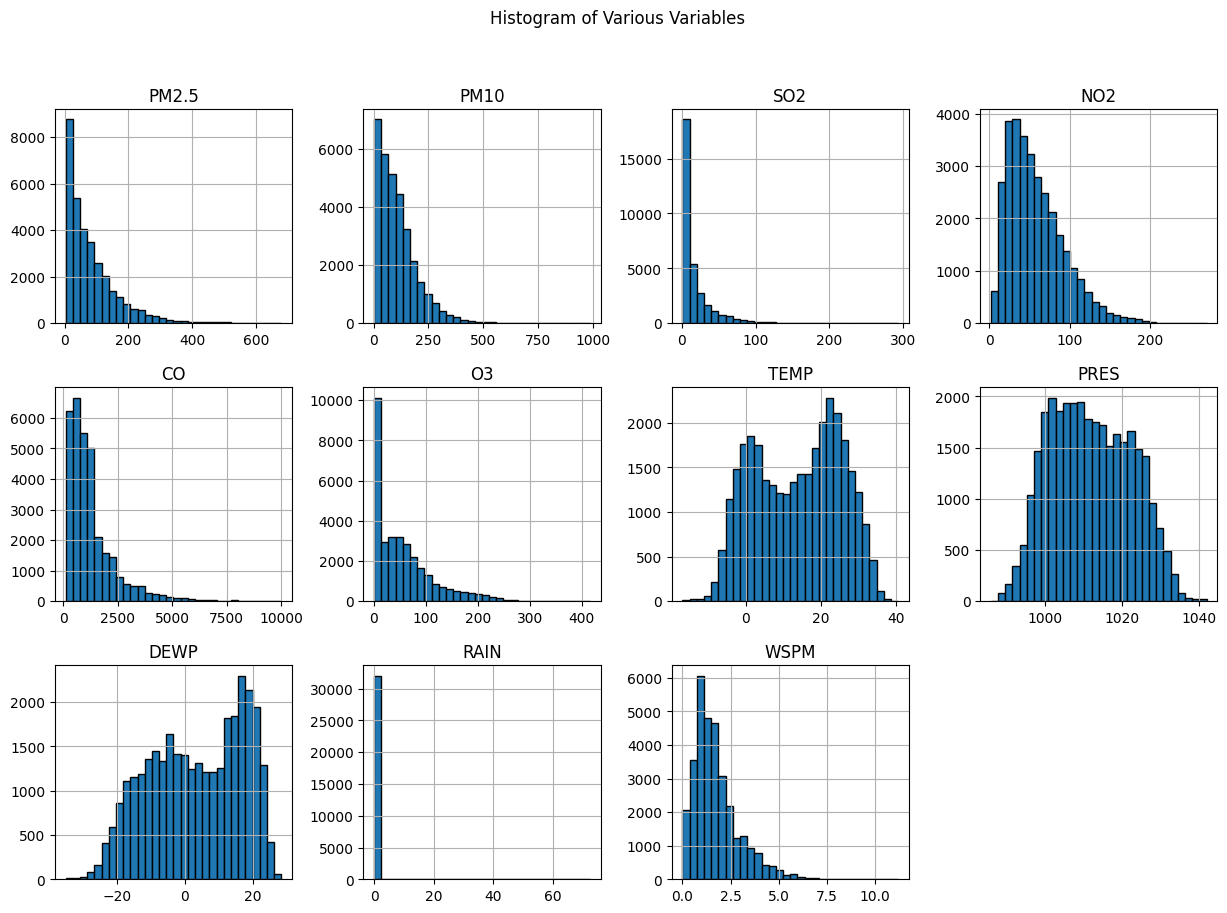

In [15]:
# 2.Distribusi Data
# Membuat histogram untuk melihat distribusi polutan dan variabel cuaca
plt.figure(figsize=(12, 8))
guanyuan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].hist(bins=30, edgecolor='black', layout=(3, 4), figsize=(15, 10))
plt.suptitle('Histogram of Various Variables')
plt.show()

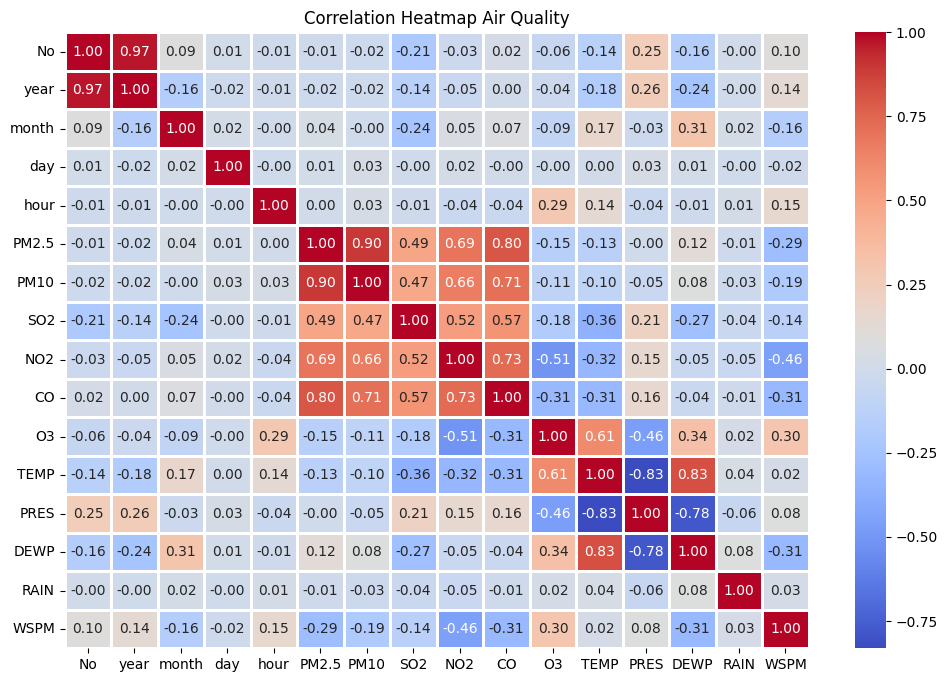

In [16]:
# 3. Korelasi Antar Variabel
# Menghitung korelasi antar variabel numerik
numeric_cols = guanyuan_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = guanyuan_df[numeric_cols].corr()

# korelasi menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.9)
plt.title('Correlation Heatmap Air Quality')
plt.show()

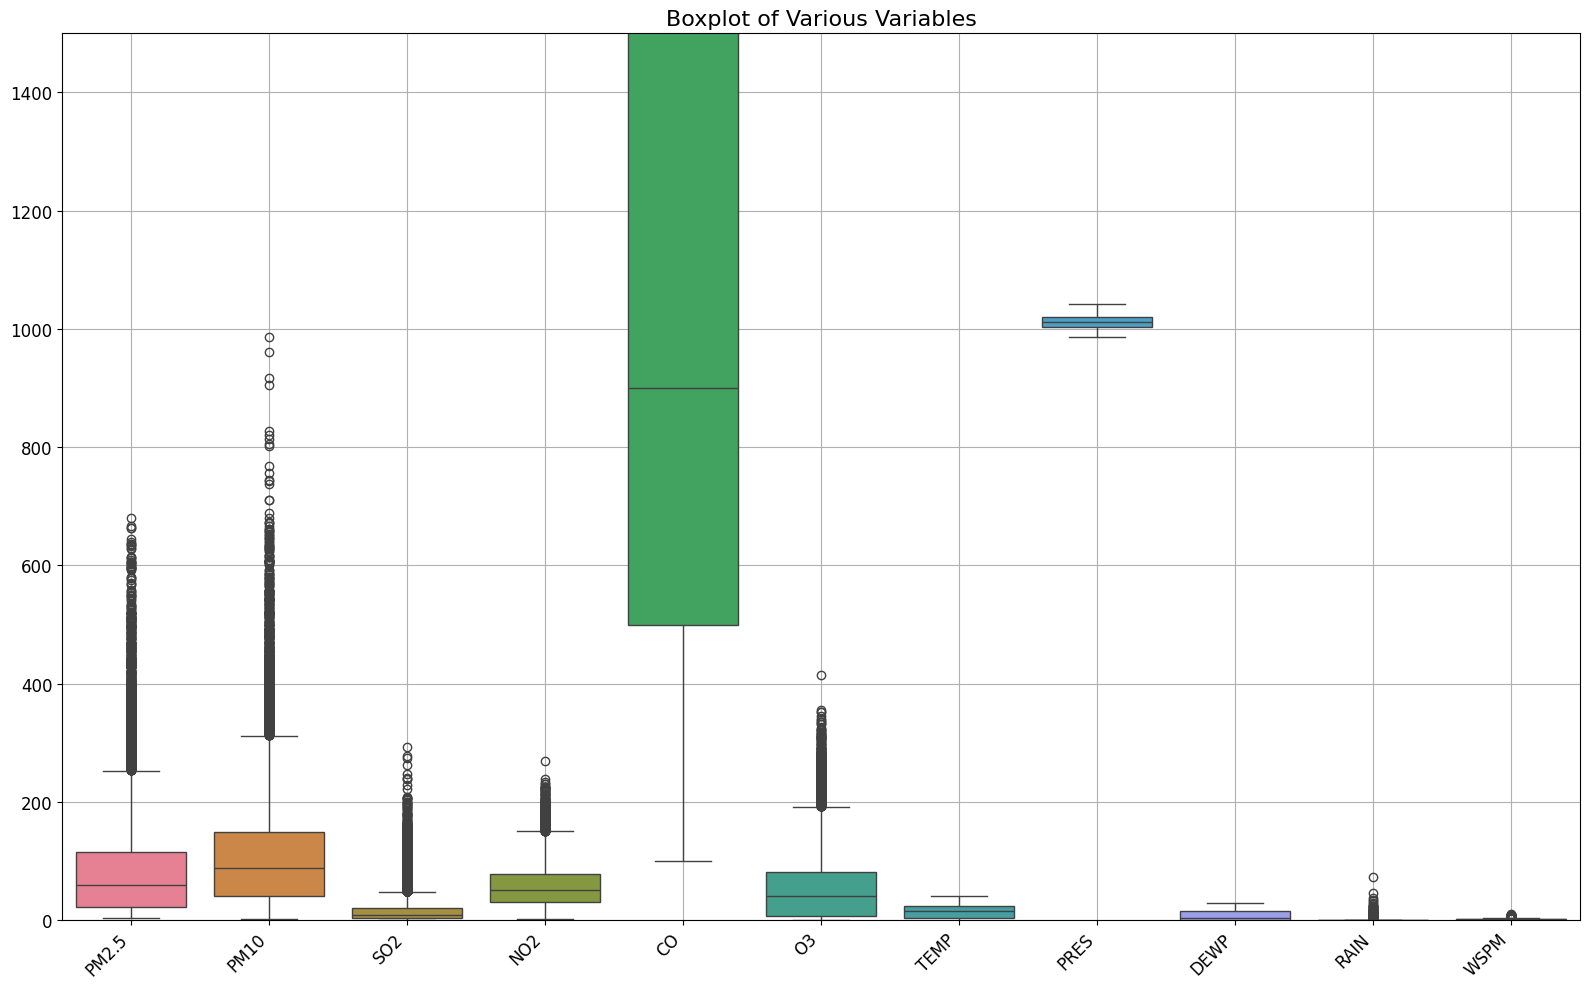

In [17]:
# 4 Membuat boxplot untuk mendeteksi outliers
plt.figure(figsize=(16, 10))
sns.boxplot(data=guanyuan_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']])
plt.title('Boxplot of Various Variables', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1500)
plt.grid(True)
plt.tight_layout()
plt.show()

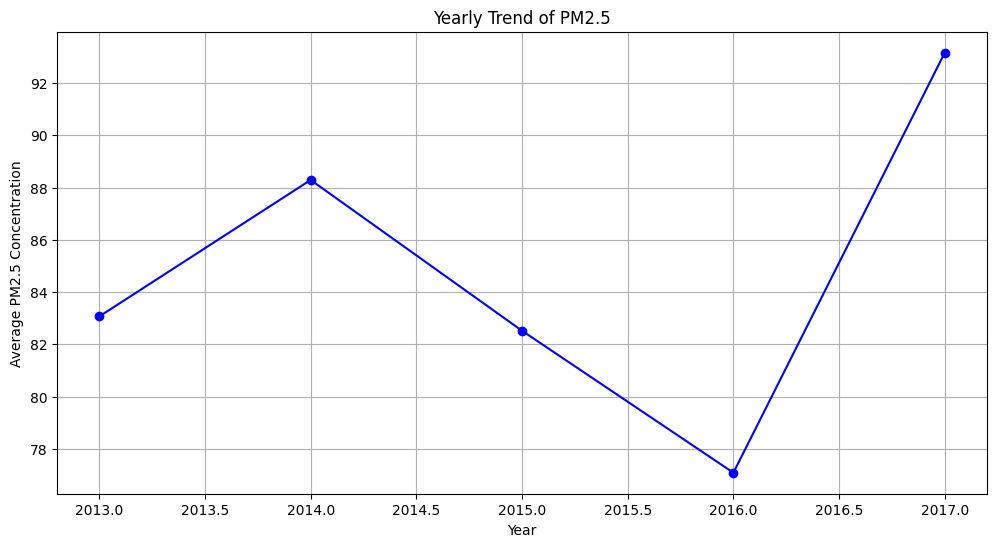

In [18]:
# 5. Waktu dan Pola Musiman
# Membuat line plot untuk melihat tren kualitas udara sepanjang waktu
plt.figure(figsize=(12, 6))
guanyuan_df.groupby('year')['PM2.5'].mean().plot(kind='line', marker='o', color='b', label='PM2.5')
plt.title('Yearly Trend of PM2.5')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Concentration')
plt.grid(True)
plt.show()

**Insight:**
- dari perhitungan deksriktif statistik dapat dilihat informasi terbaru setelah dilakukan pembersihan
- kemudian dapat terlihat informasi dari histogram distribusi data ini apakah data terdistribusi secara normal, miring, atau mungkin memiliki multimodal. histogram ini membantu memahami terhadap sebaran data dan pola yang ada.
- Heatmap Korelasi Antar Variabel juga bermanfaat untuk mengukur apakah variabel 1 dengan yang lain memiliki hubungan yang lemah atau kuat yang dapat diukur dari rentang -1 hingga 1
- boxplot ini berfungsi untuk mengukur outliers yang terdapat didalam datasetnya
- lineplot disini berfungsi untuk melihat perubahan dalam bentuk garis berdasarkan tahun

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren kualitas udara di Guanyuan dari tahun 2013 hingga 2017?

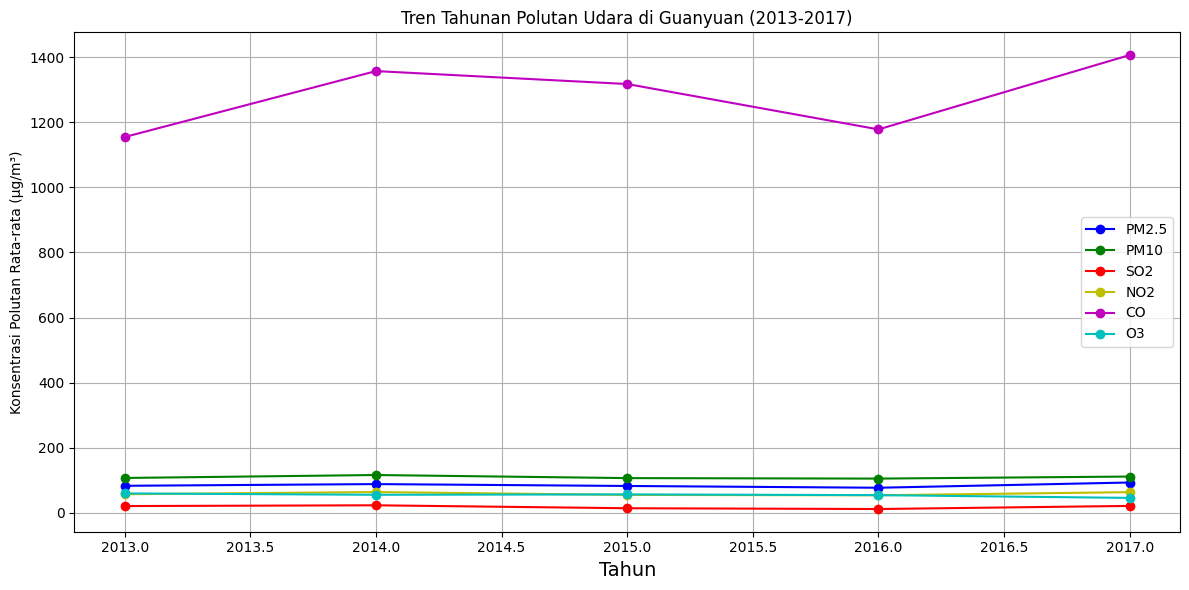

In [34]:
# Membuat Line Plot
plt.figure(figsize=(12,6))

# Plotting PM2.5, PM10, S02, N02, C0, 03 untuk melihat trennya
guanyuan_df.groupby('year')['PM2.5'].mean().plot(kind='line', marker='o', color='b', label='PM2.5')
guanyuan_df.groupby('year')['PM10'].mean().plot(kind='line', marker='o', color='g', label='PM10')
guanyuan_df.groupby('year')['SO2'].mean().plot(kind='line', marker='o', color='r', label='SO2')
guanyuan_df.groupby('year')['NO2'].mean().plot(kind='line', marker='o', color='y', label='NO2')
guanyuan_df.groupby('year')['CO'].mean().plot(kind='line', marker='o', color='m', label='CO')
guanyuan_df.groupby('year')['O3'].mean().plot(kind='line', marker='o', color='c', label='O3')

# Tambahkan Label, Judul, Legenda
plt.title('Tren Tahunan Polutan Udara di Guanyuan (2013-2017)')
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Konsentrasi Polutan Rata-rata (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


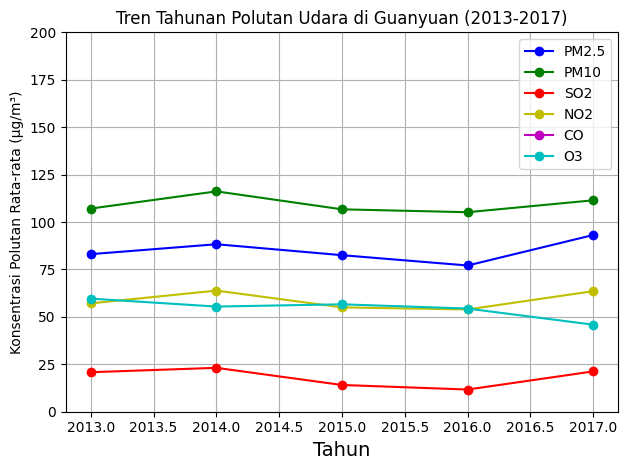

In [37]:
# Plotting PM2.5, PM10, S02, N02, C0, 03 untuk melihat trennya
guanyuan_df.groupby('year')['PM2.5'].mean().plot(kind='line', marker='o', color='b', label='PM2.5')
guanyuan_df.groupby('year')['PM10'].mean().plot(kind='line', marker='o', color='g', label='PM10')
guanyuan_df.groupby('year')['SO2'].mean().plot(kind='line', marker='o', color='r', label='SO2')
guanyuan_df.groupby('year')['NO2'].mean().plot(kind='line', marker='o', color='y', label='NO2')
guanyuan_df.groupby('year')['CO'].mean().plot(kind='line', marker='o', color='m', label='CO')
guanyuan_df.groupby('year')['O3'].mean().plot(kind='line', marker='o', color='c', label='O3')

# # Visualisasi dengan limit 200
plt.title('Tren Tahunan Polutan Udara di Guanyuan (2013-2017)')
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Konsentrasi Polutan Rata-rata (µg/m³)')
plt.legend()
plt.grid(True)
plt.ylim(0,200)
plt.tight_layout()
plt.show()

### Pertanyaan 2:
Apakah ada perbedaan yang signifikan antara polutan di musim dingin dan musim panas?

<ipython-input-20-a3f454c550cd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='PM2.5', data=guanyuan_df, palette='Set2')


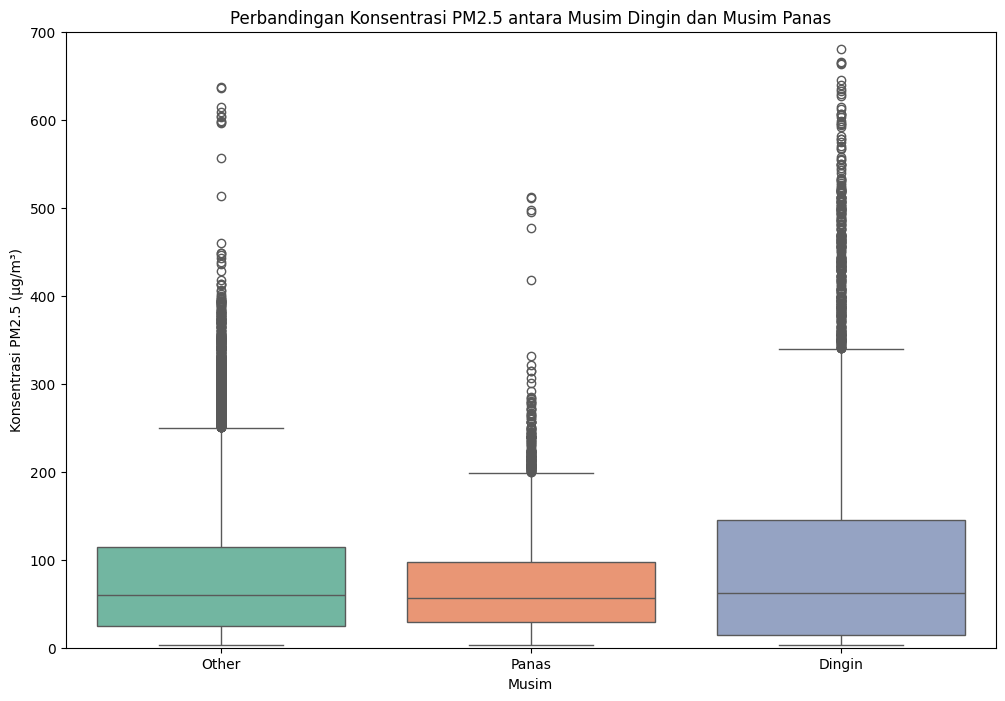

In [20]:
# Mengklasifikasikan data menjadi musim dingin dan musim panas
guanyuan_df['season'] = guanyuan_df['month'].apply(lambda x: 'Dingin' if x in [12, 1, 2] else 'Panas' if x in [6, 7, 8] else 'Other')

# Membuat boxplot untuk membandingkan polutan di musim dingin dan musim panas
plt.figure(figsize=(12, 8))
sns.boxplot(x='season', y='PM2.5', data=guanyuan_df, palette='Set2')
plt.title('Perbandingan Konsentrasi PM2.5 antara Musim Dingin dan Musim Panas')
plt.xlabel('Musim')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.ylim(0, 700)
plt.show()



<ipython-input-21-a94c4de4dcca>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='CO', data=guanyuan_df, palette='Set2')


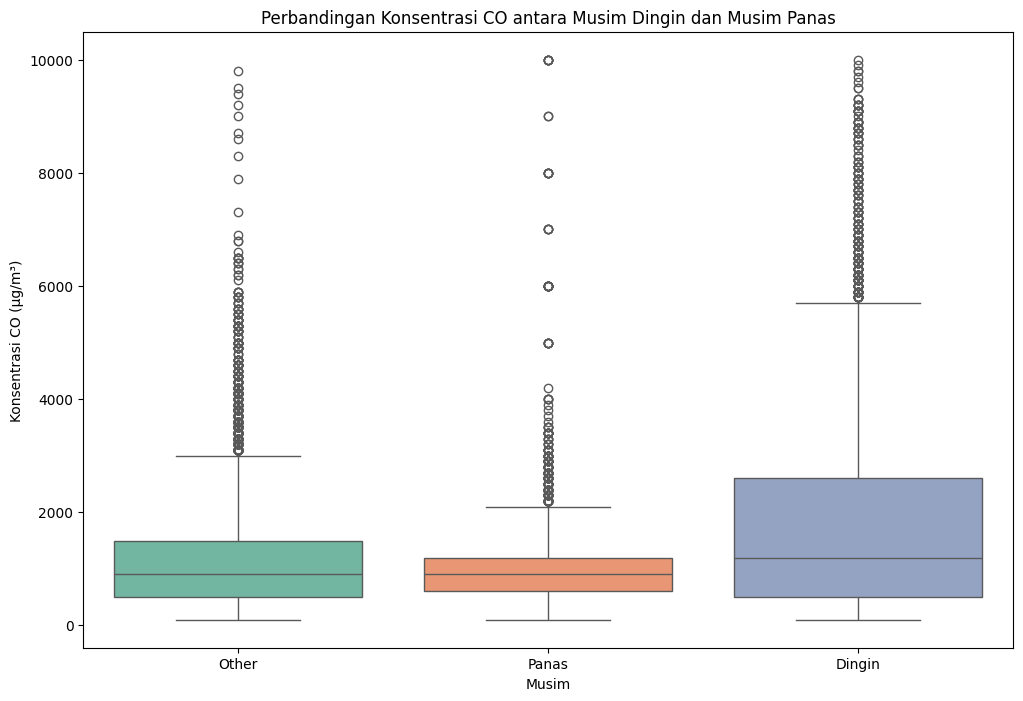

In [21]:
# Membuat boxplot untuk membandingkan polutan di musim dingin dan musim panas pada Polutan CO
plt.figure(figsize=(12, 8))
sns.boxplot(x='season', y='CO', data=guanyuan_df, palette='Set2')
plt.title('Perbandingan Konsentrasi CO antara Musim Dingin dan Musim Panas')
plt.xlabel('Musim')
plt.ylabel('Konsentrasi CO (µg/m³)')
plt.show()


### Pertanyaan 3:
Bagaimana hubungan antara polutan udara (PM2.5) dan kecepatan angin di Guanyuan?

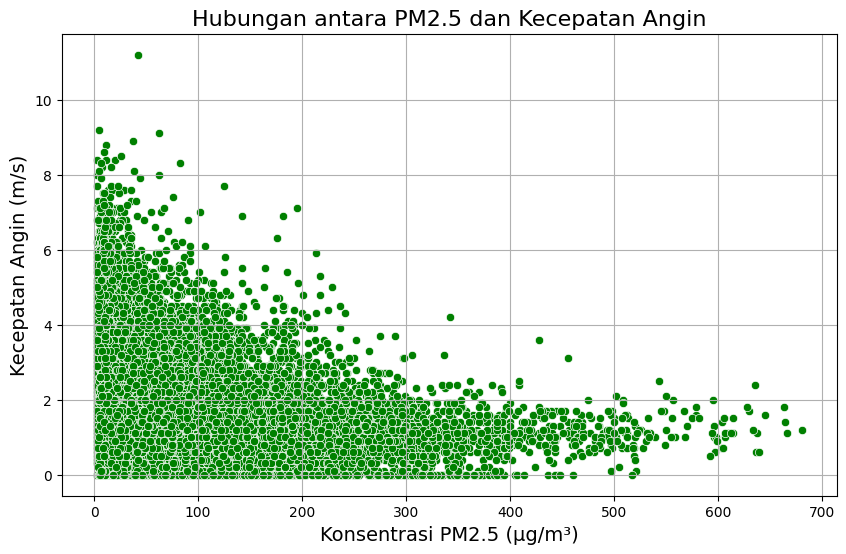

Korelasi antara PM2.5 dan Kecepatan Angin: -0.28529960838382823


In [22]:
#membuat scatter plot antara PM2.5 dengan kecepatan angin (WSPM)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PM2.5', y='WSPM', data = guanyuan_df, color= 'g')


# Menambahkan judul dan label
plt.title('Hubungan antara PM2.5 dan Kecepatan Angin', fontsize=16)
plt.xlabel('Konsentrasi PM2.5 (µg/m³)', fontsize=14)
plt.ylabel('Kecepatan Angin (m/s)', fontsize=14)
plt.grid(True)
plt.show()

# hitung nilai korelasi PM2.5 dan WSPM
correlation = guanyuan_df['PM2.5'].corr(guanyuan_df['WSPM'])
print(f"Korelasi antara PM2.5 dan Kecepatan Angin: {correlation}")


### Pertanyaan 4:
Bagaimana konsentrasi polutan berfluktuasi berdasarkan jam dalam sehari?

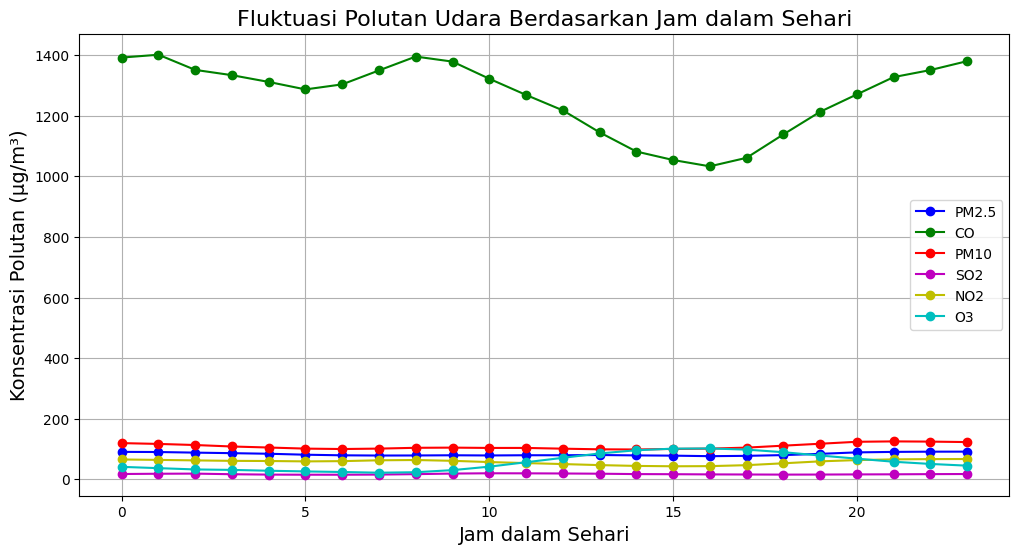

In [23]:
# Membuat line plot untuk melihat fluktuasi Polutan berdasarkan jam
plt.figure(figsize=(12, 6))

guanyuan_df.groupby('hour')['PM2.5'].mean().plot(kind='line', marker='o', color='blue', label='PM2.5')
guanyuan_df.groupby('hour')['CO'].mean().plot(kind='line', marker='o', color='g', label='CO')
guanyuan_df.groupby('hour')['PM10'].mean().plot(kind='line', marker='o', color='r', label='PM10')
guanyuan_df.groupby('hour')['SO2'].mean().plot(kind='line', marker='o', color='m', label='SO2')
guanyuan_df.groupby('hour')['NO2'].mean().plot(kind='line', marker='o', color='y', label='NO2')
guanyuan_df.groupby('hour')['O3'].mean().plot(kind='line', marker='o', color='c', label='O3')

plt.title('Fluktuasi Polutan Udara Berdasarkan Jam dalam Sehari', fontsize=16)
plt.xlabel('Jam dalam Sehari', fontsize=14)
plt.ylabel('Konsentrasi Polutan (µg/m³)', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


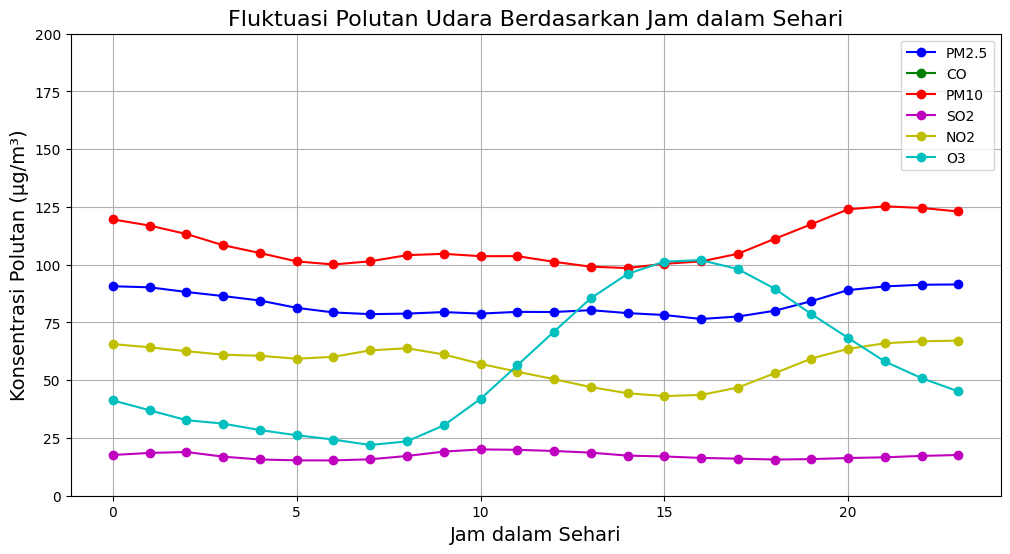

In [38]:
# Membuat line plot untuk melihat fluktuasi Polutan berdasarkan jam
plt.figure(figsize=(12, 6))

guanyuan_df.groupby('hour')['PM2.5'].mean().plot(kind='line', marker='o', color='blue', label='PM2.5')
guanyuan_df.groupby('hour')['CO'].mean().plot(kind='line', marker='o', color='g', label='CO')
guanyuan_df.groupby('hour')['PM10'].mean().plot(kind='line', marker='o', color='r', label='PM10')
guanyuan_df.groupby('hour')['SO2'].mean().plot(kind='line', marker='o', color='m', label='SO2')
guanyuan_df.groupby('hour')['NO2'].mean().plot(kind='line', marker='o', color='y', label='NO2')
guanyuan_df.groupby('hour')['O3'].mean().plot(kind='line', marker='o', color='c', label='O3')

plt.title('Fluktuasi Polutan Udara Berdasarkan Jam dalam Sehari', fontsize=16)
plt.xlabel('Jam dalam Sehari', fontsize=14)
plt.ylabel('Konsentrasi Polutan (µg/m³)', fontsize=14)
plt.grid(True)
plt.ylim(0,200)
plt.legend()
plt.show()


## Analisis Lanjutan (Opsional)

In [24]:
# Tentukan rentang konsentrasi PM2.5
bins = [0, 50, 100, 150, 200, 300]
labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi', 'Ekstrem']

# Lakukan binning untuk PM2.5
guanyuan_df['PM2.5_Level'] = pd.cut(guanyuan_df['PM2.5'], bins=bins, labels=labels, right=False)

# Tampilkan data dengan kategori PM2.5
print(guanyuan_df[['year', 'month', 'day', 'hour', 'PM2.5', 'PM2.5_Level']].head())

   year  month  day  hour  PM2.5 PM2.5_Level
0  2013      3    1     0    4.0      Rendah
1  2013      3    1     1    4.0      Rendah
2  2013      3    1     2    3.0      Rendah
3  2013      3    1     3    3.0      Rendah
4  2013      3    1     4    3.0      Rendah


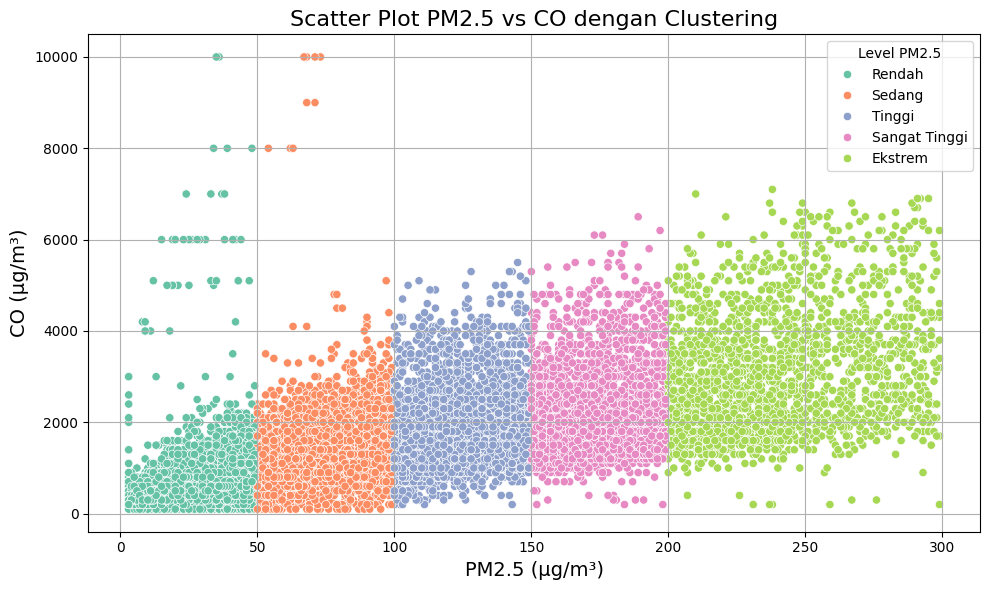

In [40]:
# Visualisasi PM2.5 dan CO berdasarkan kategori PM2.5_Level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=guanyuan_df, x='PM2.5', y='CO', hue='PM2.5_Level', palette='Set2')

# Menampilkan Visualisasi
plt.title('Scatter Plot PM2.5 vs CO dengan Clustering', fontsize=16)
plt.xlabel('PM2.5 (µg/m³)', fontsize=14)
plt.ylabel('CO (µg/m³)', fontsize=14)
plt.legend(title='Level PM2.5')
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
guanyuan_df.to_csv("all_data.csv", index=True)

## Conclusion

- Conclution pertanyaan 1
  - Pertanyaan: Bagaimana tren kualitas udara di Guanyuan dari tahun 2013 hingga 2017?
    1. PM2.5, PM10, SO2, NO2, dan O3 menunjukan fluktuasi yang realtif stabil selama periode ini, nilai polutannya tidak banyak mengalami perubahan secara drastis dari tahun ke tahun.

    2. Polutan yang terjadi di Guanyuan sekitar pada periode 2014 hingga awal 2016 mengalami beberapa penurunan konsentrasi, akan tetapi pada periode awal 2016 hingga 2017 mengalami beberapa kenaikan disetiap jenis polutan. Peningkatan dan penurunan ini bisa jadi terkait dengan faktor eksternal seperti aktivitas industri atau musim.

- Conclution pertanyaan 2
  - Pertanyaan: Apakah ada perbedaan yang signifikan antara polutan di musim dingin dan musim panas?
    1. pada boxplot polutan PM2.5, konsentrasi polutan PM2.5 pada musim dingin menunjukan konsentrasi yang lebih tinggi dibandingkan dengan musim panas. Hal ini terlihat pada boxplot yang menunjukan nilai median yang lebih tinggi dari boxplot musim panas. kondisi ini bisa jadi disebabkan oleh aktivitas pembakaran yang meningkat pada musim dingin.
    2. pada boxplot polutan CO, konsentrasi yang lebih tinggi terjadi pada kondisi musim dingin dibandingkan dengan musim panas. hal ini dapat disebabkan dengan peningkatan penggunakan bahan bakar untuk pemanasan yang dapat menghasilkan emisi CO.

- Conclution pertanyaan 3
  - Pertanyaan: Bagaimana hubungan antara polutan udara (PM2.5) dan kecepatan angin di Guanyuan?
    1. Hubungan negative yang lemah dikarenakan terdapat  kecenderungan bahwa semakin tinggi kecaepatan angin, semakin rendah konsentrasi PM2.5. Ini mengindikasikan bahwa kecepatan angin yang lebih tinggi mungkin berfungsi untuk menyebarkan polutan dan memperbaiki kualitas udara dengan membawa polutan keluar dari area tersebut.
    2. Sebagian besar titik data menunjukkan PM2.5 yang lebih tinggi berada pada kecepatan angin yang lebih rendah, sementara titik dengan PM2.5 yang sangat rendah cenderung terjadi pada kecepatan angin yang lebih tinggi.

- Conclution pertanyaan 4
  - Pertanyaan: Bagaimana konsentrasi polutan berfluktuasi berdasarkan jam dalam sehari?
    1. Polutan CO menunjukan konsentrasi yang tinggi pada jam-6-9 pagi dan 6-8 sore, hal ini mengindikasikan aktivitas manusia yang lebih padat seperti penggunaan kendaraan bermotor yang menyebabkan peningkatan polusi udara.
    2. Polutan lainnya menunjukan fluktuasi namun masih dalam kondisi yang cukup stabil.
